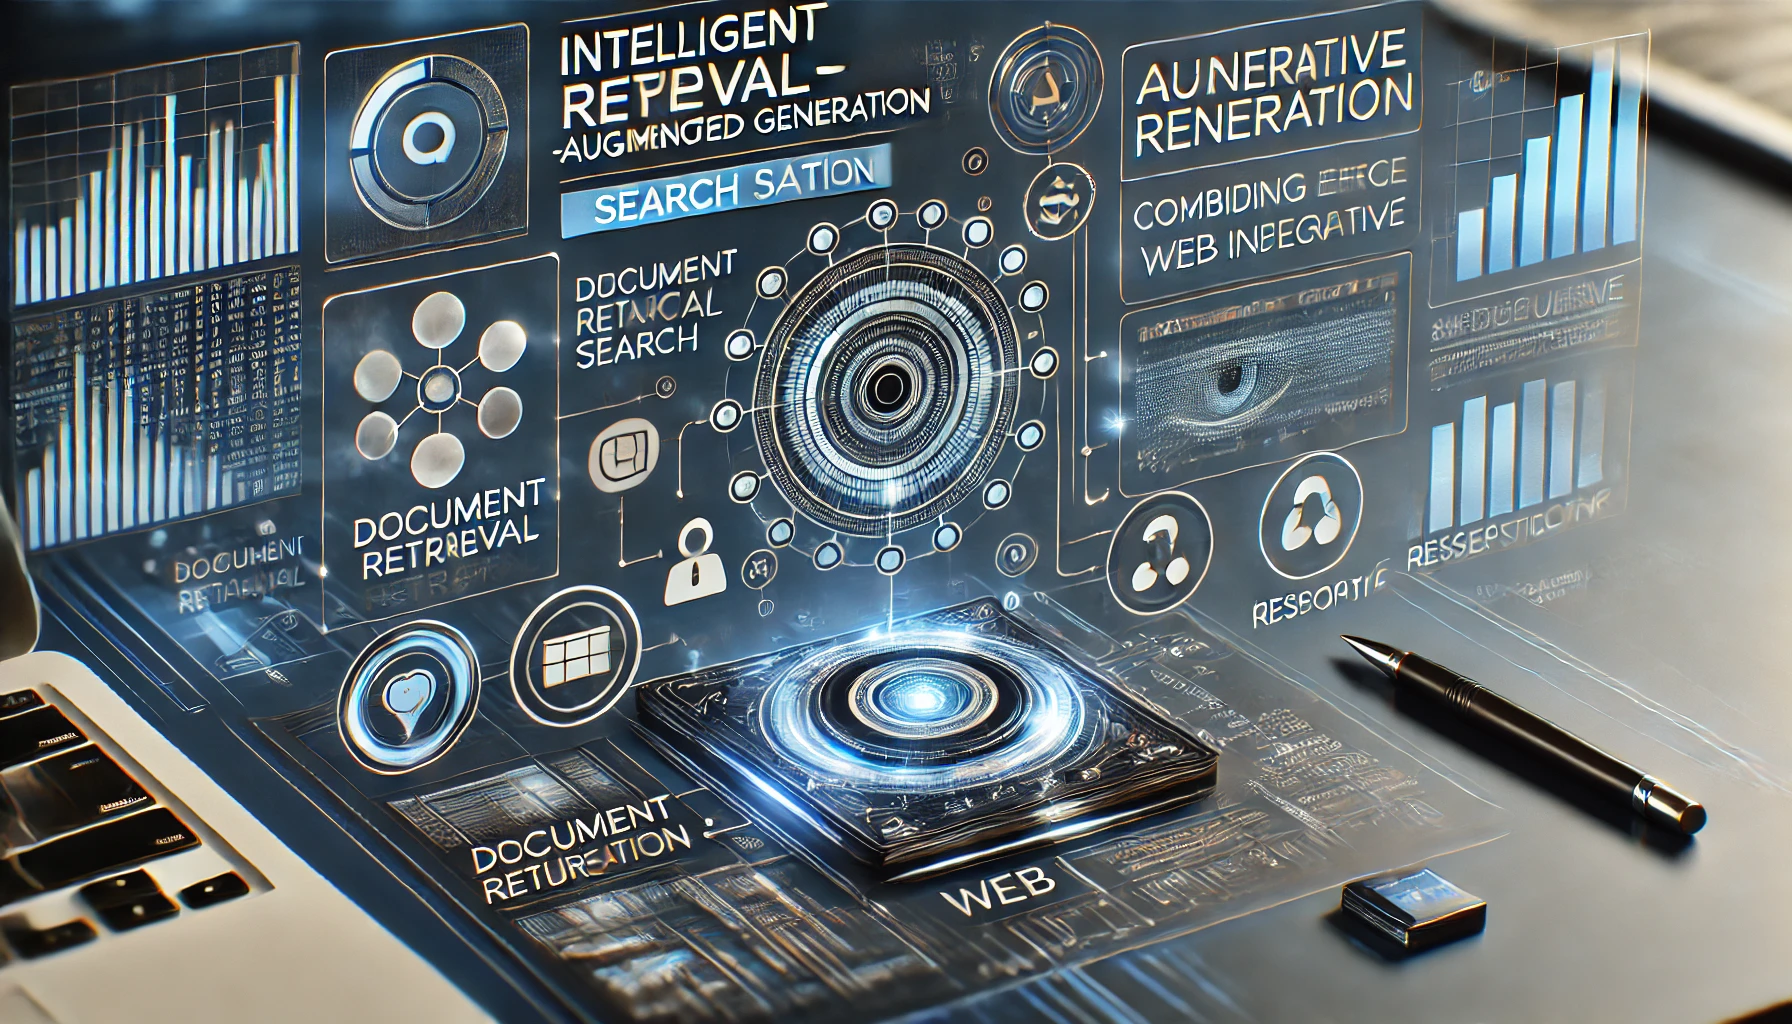

# **Project Title**

**Agentic Retrieval-Augmented Generation (RAG) System for Dynamic and Contextual Conversational AI**

# **Problem Statement**

In today’s information-driven world, users expect accurate and instant answers to a diverse range of queries. Traditional retrieval methods often struggle to find relevant content for complex queries, and standalone generative models can provide responses that lack depth or accuracy. This gap is particularly pronounced when answering questions that require both factual accuracy and contextual understanding. This project addresses these challenges by combining local document retrieval with real-time web search capabilities, supplemented by a conversational memory, to deliver contextually relevant, concise, and accurate responses. The system aims to improve user experience across various domains, from customer support to knowledge management, by enabling seamless multi-turn conversations with relevant responses even when data is not locally available.

# **Objectives**

1. **Develop a Dual-Mode Retrieval System**:
   - Implement a retrieval mechanism that seamlessly combines local document storage with real-time web searches. This hybrid retrieval ensures that if relevant local documents are unavailable, the system can dynamically access web-based resources, ensuring users receive accurate information regardless of query complexity.

2. **Integrate a Generative Model for Contextual Answering**:
   - Employ a pre-trained transformer model to synthesize responses based on available context. The model uses a mixture of retrieved local and web data to generate answers that are not only accurate but also contextually relevant, bridging the gap between information retrieval and conversational AI.

3. **Maintain Interaction History for Conversational Consistency**:
   - Design a memory mechanism that tracks user interactions, enabling the system to provide answers that account for recent questions and answers. This supports multi-turn conversations, where each response builds on prior exchanges, creating a more natural and engaging experience.

4. **Enhance Response Quality with Relevance and Accuracy Checks**:
   - Use relevance-checking mechanisms, such as cosine similarity on document embeddings, to assess the quality of retrieved documents before incorporating them into response generation. This ensures that only highly relevant documents contribute to each answer, maintaining both accuracy and relevance.

5. **Streamline User Experience through Fallback Mechanisms**:
   - Implement fallback mechanisms, including web search, that trigger when local resources are insufficient. This setup ensures that the system can handle a wide variety of queries, enhancing its adaptability and reliability in real-world use cases.

# **Business Impacts**

1. **Enhanced Customer Support**:
   - By providing accurate, context-aware answers, the system improves the efficiency of customer support. Automated responses to frequently asked questions reduce workload on support agents, allowing them to focus on complex issues, while also reducing response times and improving user satisfaction.

2. **Efficient Knowledge Management**:
   - The system can serve as a centralized knowledge repository, making it easier for employees to retrieve accurate information. This is particularly beneficial in organizations where information is spread across multiple documents and resources, as the RAG system can streamline access to important insights.

3. **Cross-Industry Scalability**:
   - The adaptability of this RAG system makes it valuable across industries. For instance, in healthcare, it can retrieve medical knowledge; in finance, it can access policy information; and in retail, it can assist with product support, providing businesses with a versatile solution for customer and internal queries.

4. **Cost Reduction Through Automation**:
   - The automation of answers to common questions reduces the need for large customer support teams, lowering operational costs. Additionally, the system’s scalability allows it to handle an increasing volume of queries without additional resources, making it cost-effective.

5. **Improved User Experience and Engagement**:
   - With the ability to maintain conversation continuity and provide highly accurate answers, the RAG system enhances user satisfaction and trust. A positive user experience contributes to better customer retention, brand loyalty, and engagement across digital platforms.

# **Approach**

1. **Data Retrieval and Similarity Calculation**:
   - The system initiates each query with a search for relevant documents in local storage, utilizing a `similarity_threshold_retriever`. This component calculates semantic similarity between the query and available documents using embedding vectors.
   - A similarity threshold filters the results, ensuring only documents with a high degree of relevance are returned, making the retrieval process efficient and contextually precise.

2. **Generative Answer Creation**:
   - For queries with relevant documents, the retrieved content is formatted into a context string. The generative model, typically a transformer-based language model, takes this context along with the query and generates a concise, informative answer.
   - The model leverages stored conversation history to maintain continuity, allowing the system to create cohesive multi-turn responses by incorporating past interactions into the current query context.

3. **Web Search Integration for Comprehensive Information**:
   - If local resources lack relevance or are insufficient, a web search is initiated using the `TavilySearchResults` API. This web search retrieves up-to-date, relevant information on-demand, which is added to the model’s context.
   - This fallback mechanism enables the system to handle broader queries and ensures that answers remain timely and accurate, even if the local knowledge base lacks specific details.

4. **Response Generation and Interaction Logging**:
   - The answer is generated based on the available documents (local and web-based) and is stored in the system’s state dictionary. Once generated, each question-answer pair is added to `chat_history`, which supports continuous dialogue flow by allowing follow-up questions to build on previous answers.

# Simple RAG

In [ ]:
# Install necessary packages
!pip install langchain -q
!pip install langchain-community langgraph langchain-chroma sentence-transformers transformers accelerate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 794.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Authenticate with Hugging Face (only needed if you're accessing private models)
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Import required modules for Hugging Face models and LangChain
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma

# Load the SentenceTransformer for embeddings (BAAI model)
embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en-v1.5")

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
<ipython-input-3-704d9cd3986d>:10: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en-v1.5")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, crea

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Load the Llama model for both question rewriting and answering
model_name = "meta-llama/Meta-Llama-3.1-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", torch_dtype=torch.float16)

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

In [ ]:
# Download and process a dataset (Wikipedia subset as in your original code)
import gdown
url = 'https://drive.google.com/uc?id=1oWBnoxBZ1Mpeond8XDUSO6J9oAjcRDyW'
gdown.download(url, quiet=False)

import gzip
import json

# Load documents from a Wikipedia dump
wikipedia_filepath = '/content/simplewiki-2020-11-01.jsonl.gz'
docs = []
with gzip.open(wikipedia_filepath, 'rt', encoding='utf8') as fIn:
    for line in fIn:
        data = json.loads(line.strip())
        docs.append({
            'metadata': {
                'title': data.get('title'),
                'article_id': data.get('id')
            },
            'data': ' '.join(data.get('paragraphs')[0:3])  # Restrict to the first 3 paragraphs for faster processing
        })

# Subset documents based on a keyword (e.g., 'India')
docs = [doc for doc in docs for x in ['india'] if x in doc['data'].lower().split()]

# Convert to LangChain document format
docs = [Document(page_content=doc['data'], metadata=doc['metadata']) for doc in docs]

# Chunk documents to smaller sizes
splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=300)
chunked_docs = splitter.split_documents(docs)

Downloading...
From (original): https://drive.google.com/uc?id=1oWBnoxBZ1Mpeond8XDUSO6J9oAjcRDyW
From (redirected): https://drive.google.com/uc?id=1oWBnoxBZ1Mpeond8XDUSO6J9oAjcRDyW&confirm=t&uuid=1c55944d-fe3f-4d39-975d-23547f6cb593
To: /content/simplewiki-2020-11-01.jsonl.gz
100%|██████████| 50.2M/50.2M [00:00<00:00, 89.2MB/s]


In [ ]:
# Create a vector database using Chroma and SentenceTransformers for embeddings
chroma_db = Chroma.from_documents(
    documents=chunked_docs,
    collection_name='rag_wikipedia_db',
    embedding=embedding_model,
    collection_metadata={"hnsw:space": "cosine"},
    persist_directory="./wikipedia_db"
)

In [ ]:
# Set up a retriever with a similarity threshold
similarity_threshold_retriever = chroma_db.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"k": 3, "score_threshold": 0.7}
)

In [ ]:
# Function to generate an answer based on the retrieved documents
def generate_response(prompt, model, tokenizer, max_new_tokens=100):
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to("cuda")
    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            attention_mask=inputs.attention_mask,
            max_new_tokens=max_new_tokens,
            pad_token_id=tokenizer.pad_token_id if tokenizer.pad_token_id is not None else -1
        )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

# Use the similarity retriever to get relevant docs based on the query
def get_top_docs(query, retriever):
    return retriever.invoke(query)

In [ ]:
# Global variable to store chat history
chat_history = []

# Function to update chat history
def update_chat_history(question, answer):
    chat_history.append({"question": question, "answer": answer})
    # Limit history size to 5 recent interactions (adjust as needed)
    if len(chat_history) > 5:
        chat_history.pop(0)

In [ ]:
def qa_rag_chain(query, retriever, model, tokenizer, web_docs=None):
    # Retrieve top documents using the original query
    top3_docs = get_top_docs(query, retriever)

    # Extract the text from the top documents
    context = " ".join([doc.page_content for doc in top3_docs])

    if web_docs:
        context += " " + web_docs

    # Build the chat history string
    history_prompt = ""
    if chat_history:
        history_prompt += "Previous interactions:\n"
        for i, interaction in enumerate(chat_history):
            history_prompt += f"Q{i+1}: {interaction['question']}\n"
            history_prompt += f"A{i+1}: {interaction['answer']}\n"

    # Formulate a prompt to encourage detailed and informative responses
    prompt = (
        "You are an intelligent assistant for question-answering tasks. "
        "Provide answers that are concise but informative, ensuring they include relevant facts.\n"
        "Use the following pieces of retrieved context to answer the question, and if you don't find the full answer in the context, "
        "use your general knowledge. Try to keep the answers between 2-3 sentences long for clarity.\n"
        "If no context is present or if you don't know the answer, say that you don't know.\n"
        "It should not be more than 2-3 sentences long.\n"
        f"{history_prompt}"
        f"Question: {query}\n"
        f"Context: {context}\n"
        "Answer:"
    )

    response = generate_response(prompt, model, tokenizer)

    # Extract the answer from the response
    answer_start = response.find("Answer:")
    if answer_start != -1:
        answer = response[answer_start + len("Answer:"):].strip()

        answer = answer.split('Note')[0].strip()

        sentences = answer.split('. ')
        if len(sentences) > 2:
            answer = '. '.join(sentences[:2]) + '.'

        # Update the chat history with the new question and answer
        update_chat_history(query, answer)

        return answer
    else:
        return response

In [ ]:
# Example Queries
query= "what is the capital of India?"

result = qa_rag_chain(query, similarity_threshold_retriever, model, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:546: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


In [ ]:
print(f"Query: {query}")
print(f"Response: {result}")

Query: what is the capital of India?
Response: The capital of India is New Delhi. It is a union territory and a megacity located in the North Indian zone.


In [ ]:
# Example Queries
query= "Are you sure?"

result = qa_rag_chain(query, similarity_threshold_retriever, model, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:546: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


In [ ]:
print(f"Query: {query}")
print(f"Response: {result}")

Query: Are you sure?
Response: Yes, I am sure. New Delhi has been the capital of India since 1911 and is home to many national institutions and monuments, including the Rashtrapati Bhavan and the India Gate.


In [ ]:
# Example Queries
query= "who won the champions league in 2024?"

result = qa_rag_chain(query, similarity_threshold_retriever, model, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:546: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


In [ ]:
print(f"Query: {query}")
print(f"Response: {result}")

Query: who won the champions league in 2024?
Response: I don't know. There is no information available in the provided context about the Champions League winner in 2024.


# Agentic RAG

In [ ]:
from getpass import getpass
import os
from langchain_community.tools.tavily_search import TavilySearchResults
from typing import List, Dict, Any
from typing_extensions import TypedDict
from langchain.embeddings import HuggingFaceEmbeddings
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

Enter Tavily Search API Key: ··········


In [ ]:
tv_search = TavilySearchResults(max_results=3, search_depth='advanced', max_tokens=10000)

In [ ]:
class GraphState(TypedDict):
    question: str
    generation: str
    web_search_needed: str
    documents: List[str]

# Retrieve documents from the vector store
def retrieve(state: GraphState, similarity_threshold_retriever) -> GraphState:
    print("---RETRIEVE DOCUMENTS---")

    query = state["question"]
    try:
        docs = similarity_threshold_retriever.get_relevant_documents(query)
        if docs:
            print("Documents retrieved successfully.")
            state["documents"] = [doc.page_content for doc in docs]
        else:
            print("No relevant documents found.")
            state["documents"] = []
    except Exception as e:
        print(f"Error during document retrieval: {e}")
        state["documents"] = []

    return state

# Generate an answer using qa_rag_chain
def generate_answer(state: GraphState, similarity_threshold_retriever, model, tokenizer) -> GraphState:
    print("---GENERATE ANSWER---")
    question = state["question"]
    documents = state["documents"]

    if documents:
        try:
            web_docs = " ".join(documents) if state["web_search_needed"] == "Yes" else None
            generation = qa_rag_chain(question, similarity_threshold_retriever, model, tokenizer, web_docs)

            if "There is no information" in generation:
                print("No relevant information in documents. Initiating web search...")
                state["web_search_needed"] = "Yes"
                return state

            state["generation"] = generation
            state["web_search_needed"] = "No"
            return state

        except Exception as e:
            print(f"Error during answer generation: {e}")
            state["generation"] = "Error generating answer."
            return state

    else:
        print("No relevant documents. Initiating web search...")
        state["generation"] = "No relevant documents. Please use web search."
        state["web_search_needed"] = "Yes"
        return state


# Web search handler
def web_search(state: GraphState, tv_search) -> GraphState:
    print("---WEB SEARCH---")
    query = state["question"]
    try:
        # Perform the web search
        docs = tv_search.invoke(query)
        # Check if the web search tool returns a list of documents
        if isinstance(docs, list) and all(isinstance(doc, dict) for doc in docs):
            # Extract content from the documents
            state["documents"] = [doc.get('content', '') for doc in docs]
        else:
            print("Unexpected format or empty results from web search.")
            state["documents"] = []
    except Exception as e:
        print(f"Error during web search: {e}")
        state["documents"] = []

    return state


# Relevance check function
def relevance_check(documents: List[str], query: str, embedding_model, threshold=0.7) -> bool:
    """
    Enhanced relevance check based on semantic similarity using embeddings.
    """
    query_embedding = embedding_model.embed_query(query)

    for doc in documents:
        doc_embedding = embedding_model.embed_query(doc)  # Embed document content
        # Cosine similarity between the query and document embeddings
        similarity = cosine_similarity([query_embedding], [doc_embedding])[0][0]
        if similarity > threshold:
            return True
    return False

# Decision function to determine the next step
def decide_to_generate(state: GraphState, embedding_model) -> str:
    print("---ASSESS WEB SEARCH NEED---")

    if state["documents"] and relevance_check(state["documents"], state["question"], embedding_model):
        state["web_search_needed"] = "No"
    else:
        state["web_search_needed"] = "Yes"

    return "web_search" if state["web_search_needed"] == "Yes" else "generate_answer"

# Agent controlling the flow
def agent(state: GraphState, similarity_threshold_retriever, model, tokenizer, tv_search, embedding_model) -> GraphState:
    # Attempt to retrieve documents
    state = retrieve(state, similarity_threshold_retriever)

    # Determine whether to use web search
    next_step = decide_to_generate(state, embedding_model)

    if next_step == "web_search":
        state = web_search(state, tv_search)

    # Generate the final answer using the available documents or web search results
    state = generate_answer(state, similarity_threshold_retriever, model, tokenizer)

    # Update chat history after the answer is generated
    if state["generation"]:
        update_chat_history(state["question"], state["generation"])

    return state

In [ ]:
state = {
    "question": "What is the capital of India?",
    "generation": "",
    "web_search_needed": "",
    "documents": []
}

final_state = agent(state, similarity_threshold_retriever, model, tokenizer, tv_search, embedding_model)

---RETRIEVE DOCUMENTS---


<ipython-input-20-332b50103691>:13: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = similarity_threshold_retriever.get_relevant_documents(query)
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:546: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


Documents retrieved successfully.
---ASSESS WEB SEARCH NEED---
---GENERATE ANSWER---


In [ ]:
print(f'Query: {final_state["question"]}')
print(f'Response: {final_state["generation"]}')

Query: What is the capital of India?
Response: The capital of India is New Delhi. It is a union territory and a megacity located in the North Indian zone.


In [ ]:
state = {
    "question": "Are you sure?",
    "generation": "",
    "web_search_needed": "",
    "documents": []
}

final_state = agent(state, similarity_threshold_retriever, model, tokenizer, tv_search, embedding_model)

---RETRIEVE DOCUMENTS---
No relevant documents found.
---ASSESS WEB SEARCH NEED---
---WEB SEARCH---


---GENERATE ANSWER---


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:546: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


In [ ]:
print(f'Query: {final_state["question"]}')
print(f'Response: {final_state["generation"]}')

Query: Are you sure?
Response: Yes, I am sure. The capital of India is New Delhi, as previously stated.


In [ ]:
state = {
    "question": "who won the champions league in 2024?",
    "generation": "",
    "web_search_needed": "",
    "documents": []
}

final_state = agent(state, similarity_threshold_retriever, model, tokenizer, tv_search, embedding_model)

---RETRIEVE DOCUMENTS---
No relevant documents found.
---ASSESS WEB SEARCH NEED---
---WEB SEARCH---


---GENERATE ANSWER---


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:546: UserWarning: `pad_token_id` should be positive but got -1. This will cause errors when batch generating, if there is padding. Please set `pad_token_id` explicitly by `model.generation_config.pad_token_id=PAD_TOKEN_ID` to avoid errors in generation, and ensure your `input_ids` input does not have negative values.
  warnings.warn(


In [ ]:
print(f'Query: {final_state["question"]}')
print(f'Response: {final_state["generation"]}')

Query: who won the champions league in 2024?
Response: Real Madrid won the Champions League in 2024, defeating Borussia Dortmund 2-0 in the final. They secured a record-extending fifth Champions League title.


# **Conclusion**

The Agentic RAG system provides a robust and flexible solution for conversational AI, combining document retrieval with generative responses to answer complex queries across diverse domains. Through a multi-layered approach of local retrieval, real-time web search, and conversational memory, this system delivers accurate, contextually aware answers that adapt to user needs. Its hybrid architecture allows it to maintain high relevance and accuracy, making it an ideal solution for dynamic environments where information retrieval and synthesis are essential. This system demonstrates a successful fusion of retrieval and generation, achieving results that surpass those of traditional retrieval or standalone generative models.

# **Future Scope of Improvement**


1. **Advanced Relevance Filtering and Document Embeddings**:
   - Future iterations could leverage more sophisticated similarity models, such as transformer-based embeddings (e.g., Sentence-BERT) to enhance document relevance filtering. This would provide a more nuanced similarity assessment, improving the quality of retrieved documents.

2. **User Feedback Integration for Model Optimization**:
   - Incorporating a feedback loop where users can rate responses would allow the model to learn from user preferences. This feedback data could be used to retrain the model periodically, improving its accuracy and relevance over time based on actual user interactions.

3. **Multilingual and Multimodal Support**:
   - Expanding support to multiple languages would broaden the system’s usability across global markets. Additionally, incorporating multimodal support, such as processing images or videos, would enhance its capabilities, making it applicable to domains where textual information is limited.

4. **Enhanced Privacy and Security Controls**:
   - Implementing data anonymization, encryption, and strict access controls could make this system compliant with data privacy laws like GDPR and HIPAA, especially important for sensitive domains such as healthcare or finance.

5. **User Personalization**:
   - Adding a user-specific memory or profile would allow the system to tailor responses based on individual preferences, prior interactions, or historical data, creating a more personalized experience that improves user satisfaction and engagement.

6. **Real-Time Learning with Adaptive Models**:
   - By integrating real-time learning capabilities, the system could continuously adapt to new data, trends, and information sources. This would be particularly beneficial in fast-evolving fields, such as finance or technology, where staying updated with the latest information is crucial.